In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [56]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kritanjalijain/amazon-reviews")

print("Path to dataset files:", path)

# path = "/kaggle/input/amazon-reviews"

Using Colab cache for faster access to the 'amazon-reviews' dataset.
Path to dataset files: /kaggle/input/amazon-reviews


In [ ]:
df_train_original = pd.read_csv(f"{path}/train.csv" , header=None)
df_test_original = pd.read_csv(f'{path}/test.csv' , header = None)

In [58]:
df_train_original.columns = ['polarity', 'title', 'text']
df_test_original.columns = ['polarity', 'title', 'text']

In [101]:
from sklearn.model_selection import train_test_split

# Assuming df_train has columns like: ['text', 'polarity', ...]
df_train, _ = train_test_split(
    df_train_original,
    train_size=1_00_000,
    stratify=df_train_original['polarity'],  # keeps label balance
    random_state=42
)

df_test, _ = train_test_split(
    df_test_original,
    train_size=20_000,
    stratify=df_test_original['polarity'],  # keeps label balance
    random_state=42
)

print(df_train.shape)

print(df_test.shape)

(100000, 3)
(20000, 3)


In [102]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 2932751 to 702305
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   polarity  100000 non-null  int64 
 1   title     99997 non-null   object
 2   text      100000 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.1+ MB


In [103]:
df_train.head()

,polarity,title,text
2932751,1,Poor Connection,While you don't need to spend very much on opt...
1256118,2,Words cannot describe how much I love this.,"When I ordered this, I was just excited to hav..."
2012010,2,Dryer Balls VS. Fabric Softener and Dryer Sheets,Why are these better than dryer sheets and fab...
1479924,2,Love it!,I may have only played this game twice at my h...
771909,1,Wasn't impressed,"I hated this book! Yes, there are issues with ..."


In [104]:
# polarity column description
# 1 == Negative
# 2 == Positive
df_train['polarity'].unique()

array([1, 2])

In [105]:
df_train['polarity'].value_counts()

,count
polarity,
1,50000
2,50000


In [106]:
# LOWER CASE THE DATA OF COLUMN 'title'

df_train['title'] = df_train['title'].str.lower()

In [107]:
# LOWER CASE THE DATA OF COLUMN 'text'

df_train['text'] = df_train['text'].str.lower()

In [108]:
df_train['title'].sample(10)

,title
1703248,great listen.
2216018,"give me freedom, not restrictions!"
275315,not quite what i expected
1713102,"from the liner notes,and track listing"
2035221,wonderful stories with practical applications
2245735,a careless reprint
1228936,awesome !
322514,only one problem
3177753,disappointed
10968,"huggies snug and dry is much better, and are a..."


In [109]:
print("shape of df_train: ",df_train.shape)
print("shape of df_test: ",df_test.shape)

shape of df_train:  (100000, 3)
shape of df_test:  (20000, 3)


In [110]:
# nan values in df_train
df_train.isna().sum()

,0
polarity,0
title,3
text,0


In [111]:
#  nan values in df_test
df_test.isna().sum()

,0
polarity,0
title,1
text,0


In [112]:
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

0
0


In [113]:
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

In [114]:
# drop nan values
df_train = df_train.dropna()
df_test = df_test.dropna()

In [115]:
#  droping title as i think it is not needed for now

df_train = df_train.drop(['title'], axis=1)
df_test = df_test.drop(['title'], axis=1)

In [116]:
import string
translator = str.maketrans('','',string.punctuation)
digit = str.maketrans('','',string.digits)

In [117]:
# removing punctuations from title
# df_train['title'] = df_train['title'].apply(lambda x: x.translate(translator))

In [118]:
# removing punctuations from text
df_train['text'] = df_train['text'].apply(lambda x: x.translate(translator))

In [119]:
# removing punctuations from text
df_test['text'] = df_test['text'].apply(lambda x: x.translate(translator))

In [120]:
df_train.sample(10)

,polarity,text
2803533,2,this movie is a work of unbelievable dedicatio...
1456834,2,i bought this about 7 months ago and never had...
2810058,2,if youre looking for another recording of the ...
2326722,1,i really enjoyed several of howard fasts other...
502110,1,there are five measuring spoons but in very st...
2651704,2,so i was pretty skepticalbecause im use to see...
341970,1,difficult to fillow scattered not enough guida...
3365450,1,cons flimsy plastic over the spring came apart...
2384077,2,in a world of processed cheese thank god for s...
1491216,2,the introduction and the a brief history of th...


In [121]:
# removing the numbers from the "title"
# df_train['title'] = df_train['title'].apply(lambda x: x.translate(digit))

In [122]:
# removing the numbers from the "text"
df_train['text'] = df_train['text'].apply(lambda x: x.translate(digit))

In [123]:
# removing the numbers from the "text"
df_test['text'] = df_test['text'].apply(lambda x: x.translate(digit))

In [124]:
df_train.sample(10)

,polarity,text
328144,1,the product feature says patent shouldnt that ...
464755,1,we got this as a gift for christmas for our a...
1529686,1,for the first year or so i had the headphones ...
165906,1,the author does a nice job recounting schmidts...
2127743,2,this was seriousely the very best movie i have...
1105328,2,this album had many good songs and typical ran...
1011023,2,bought this for my wife along with a garmin nu...
1801995,1,im afraid thats about all i can say for it the...
1084534,2,i loved this movie it has the original appeara...
936857,1,i used the heater infrequently for a couple of...


In [125]:
# removing extra spaces just in case
# df_train['title'] = df_train['title'].str.strip()
df_train['text'] = df_train['text'].str.strip()


In [126]:

df_test['text'] = df_test['text'].str.strip()

In [127]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


In [128]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [129]:
stopword = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [130]:
from tqdm import tqdm
tqdm.pandas()

In [131]:
# removing stop words and also applying the tokenizations

def tokenization_and_stopwords_removal(text):
    tokenized_text = word_tokenize(text)
    texts = [word for word in tokenized_text if word.lower() not in stopword ]
    stemmed_text = [stemmer.stem(word) for word in texts]


    return " ".join(stemmed_text)

df_train['text'] = df_train['text'].progress_apply(tokenization_and_stopwords_removal)

100%|██████████| 99997/99997 [01:56<00:00, 857.30it/s] 


In [133]:
df_test['text'] = df_test['text'].progress_apply(tokenization_and_stopwords_removal)

100%|██████████| 19999/19999 [00:19<00:00, 1002.91it/s]


In [135]:

df_train.sample(10)

,polarity,text
3017434,2,look onion soup bowl found theyr perfect use s...
2462956,1,book said instock never ship unabl get respons...
2539512,1,movi cake wait nice tabl cake parti movi men w...
731581,2,kate hathaway one best realli make charact see...
3504210,2,great book help son languag develop bought tur...
3575326,2,camcord far best one ever use life get butt lo...
990981,2,love everi song except dont mebut wasnt badth ...
1884805,2,open spiderman packag wonder game worth ask pl...
1643521,2,arriv quickli perfect condit laugh like
783594,1,one influenti book ofmi youth accept truthth a...


In [136]:
print("df_train['polarity] ",  df_train['polarity'].value_counts())
print("")
print("df_test['polarity] ",  df_test['polarity'].value_counts())


df_train['polarity]  polarity
2    49999
1    49998
Name: count, dtype: int64

df_test['polarity]  polarity
2    10000
1     9999
Name: count, dtype: int64


In [137]:
print(f"df_test is null or not\n\n {df_test.isnull().sum()}")
print('')
print(f"df_train is null or not\n\n {df_train.isnull().sum()}")

df_test is null or not

 polarity    0
text        0
dtype: int64

df_train is null or not

 polarity    0
text        0
dtype: int64


In [138]:
# now negative = 0, positive = 1 for simplicity

df_train['polarity'] = df_train['polarity'].map({2:1, 1:0})
df_test['polarity'] = df_test['polarity'].map({2:1,1:0})

In [139]:
X_train = df_train['text'].astype('str')
Y_train = df_train['polarity']
X_val = df_test['text'].astype('str')
Y_val = df_test['polarity']

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1,1),
    max_features=5000
)

In [141]:

from scipy.stats import loguniform
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
W2V_DIM = 300

pipeline = Pipeline([
            ('vector', tfidf_vectorizer),
            ('clf', LogisticRegression())
            ])

param_grid = [
    {
        'clf':[LogisticRegression(solver='saga', max_iter=3000, n_jobs=-1)],
        'clf__C':loguniform(0.01,100),
        'clf__penalty': ['l1', 'l1'],
        'vector__ngram_range':[(1,1),(1,2)]
    },
    {
        'clf': [LinearSVC(random_state=42, max_iter=3000)],
        'clf__C': loguniform(0.01, 100),
        'clf__dual': [False],
        "vector__ngram_range": [(1,1), (1,2)]
    }
]

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [142]:
search.fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('vector',
                                              TfidfVectorizer(max_features=5000,
                                                              stop_words='english')),
                                             ('clf', LogisticRegression())]),
                   n_jobs=-1,
                   param_distributions=[{'clf': [LogisticRegression(max_iter=3000,
                                                                    n_jobs=-1,
                                                                    solver='saga')],
                                         'clf__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a11fb503110>,
                                         'clf__penalty': ['l1', 'l1'],
                                         'vector__ngram_range': [(1, 1),
                                                                 (1, 2)]},
                                        {'clf': [LinearSVC(max_iter=3000,
                                                           random_state=42)],
                                         'clf__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a11fb503d70>,
                                         'clf__dual': [False],
                                         'vector__ngram_range': [(1, 1),
                                                                 (1, 2)]}],
                   random_state=42, scoring='accuracy', verbose=2)

In [143]:
print(f'best cross-validation score: {search.best_score_:.4f}')
print(f'best parameters: {search.best_params_}')

best_model = search.best_estimator_
test_accuracy = best_model.score(X_val , Y_val)
print(f'test set accuracy (final model): {test_accuracy:.4f}')

best cross-validation score: 0.8512
best parameters: {'clf': LogisticRegression(max_iter=3000, n_jobs=-1, solver='saga'), 'clf__C': np.float64(2.950706670790534), 'clf__penalty': 'l1', 'vector__ngram_range': (1, 2)}
test set accuracy (final model): 0.8546


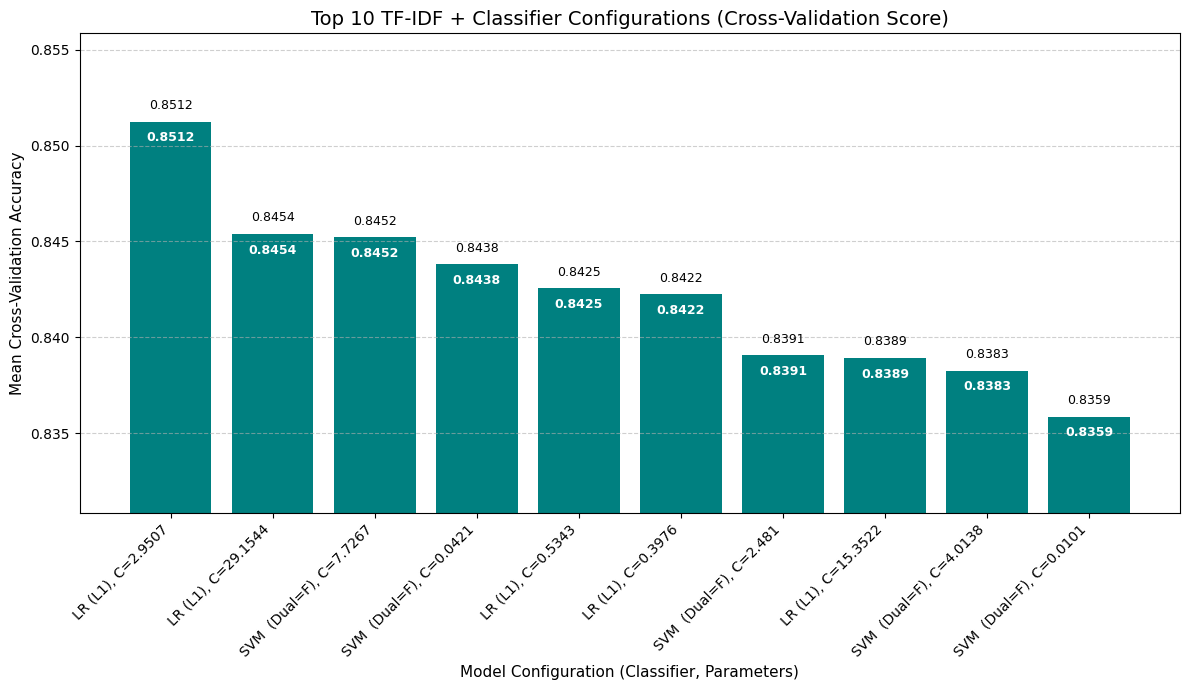

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Access Results ---
# Assuming 'search' is your fitted RandomizedSearchCV object
# NOTE: Make sure 'search' is defined and fitted before running this.
cv_results = pd.DataFrame(search.cv_results_)

# --- 2. Extract Key Metrics and Parameters (FIXED: Removed param_clf__loss) ---
# We extract only the parameters actually present in your search grid (C, penalty, dual)
results = cv_results[[
    'param_clf',
    'param_clf__C',
    'param_clf__penalty',
    'param_clf__dual', # Added the 'dual' parameter from your LinearSVC grid
    'mean_test_score',
    'rank_test_score'
]].copy() # Use .copy() to avoid SettingWithCopyWarning

# Clean up the classifier name
results['Classifier'] = results['param_clf'].apply(
    lambda x: x.__class__.__name__
)

# Fill NaN parameter values with an empty string for safe label creation
results['param_clf__penalty'] = results['param_clf__penalty'].fillna('')
results['param_clf__dual'] = results['param_clf__dual'].fillna('')


# Create a readable label for each parameter set (model configuration)
def create_model_label(row):
    clf = row['Classifier']
    C = round(row['param_clf__C'], 4)

    if clf == 'LogisticRegression':
        penalty = row['param_clf__penalty']
        # If penalty is L1, it uses a specific solver/configuration
        penalty_label = f"({penalty.upper()})" if penalty else ""
        return f"LR {penalty_label}, C={C}"

    elif clf == 'LinearSVC':
        # Check if 'dual' was explicitly set (it was 'False' in your grid)
        dual_label = f" (Dual=F)" if row['param_clf__dual'] is False else ""
        return f"SVM {dual_label}, C={C}"

    return clf

results['Model_Config'] = results.apply(create_model_label, axis=1)

# --- 3. Filter and Sort the Top Results ---
# Filter and sort the top 10 models
top_n = 10
top_results = results.sort_values(by='rank_test_score').head(top_n)

# --- 4. Plotting ---
plt.figure(figsize=(12, 7))

# Create a bar chart showing the cross-validation score for each model
bars = plt.bar(
    top_results['Model_Config'],
    top_results['mean_test_score'],
    color='teal' # Changed color for better visibility
)

# Add scores above the bars
for bar in bars:
    yval = bar.get_height()
    # Position text slightly lower if the bar is close to the top
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.0005,
             f'{yval:.4f}', ha='center', va='top', color='white', fontweight='bold', fontsize=9)
    # Add a fallback text just above the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.0005,
             f'{yval:.4f}', ha='center', va='bottom', color='black', fontsize=9)

# Adjust y-limits and add plot elements
min_score = top_results['mean_test_score'].min()
plt.ylim(min_score - 0.005, min_score + 0.02) # Set a tight y-limit around the top scores

plt.title(f'Top {top_n} TF-IDF + Classifier Configurations (Cross-Validation Score)', fontsize=14)
plt.ylabel('Mean Cross-Validation Accuracy', fontsize=11)
plt.xlabel('Model Configuration (Classifier, Parameters)', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Save the plot
plt.savefig('top_model_scores.png')
plt.show()

In [144]:
from joblib import dump, load

# --- Assume 'search' is your fitted RandomizedSearchCV object ---

# 1. Access the best model (which is the entire Pipeline)
best_pipeline = search.best_estimator_

# 2. Define the filename
# Use a clear, descriptive filename
filename = 'best_tfidf_sentiment_model.joblib'

# 3. Save the entire pipeline object to disk
# This saves the fitted TfidfVectorizer AND the fitted LinearSVC/LogisticRegression model
dump(best_pipeline, filename)

print(f"✅ Model successfully saved as: {filename}")

✅ Model successfully saved as: best_tfidf_sentiment_model.joblib
